<table align="left" width=100%>
    <tr>
        <td width="12%">
            <img src="../../../images/RA_Logo.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=6px>
                    <b>House Prediction Model - 01 </b>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/vidyadharbendre/learn_machine_learning/blob/main/regression/jupyter_notebooks/01_house_price_prediction/house_pred_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/vidyadharbendre/learn_machine_learning/blob/main/regression/jupyter_notebooks/01_house_price_prediction/house_pred_model.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

In [105]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot

# import 'stats'
from scipy import stats

In [106]:
!ls Housing.csv

Housing.csv


In [108]:
df = pd.read_csv('Housing.csv')

In [109]:
#1_1. shape This is to know the number of rows and columns - shape of the data
df.shape

(545, 13)

In [110]:
#1_2. df.info(). This is know the number of non-null entries, # of columns, datatypes & memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


This output provides you with an overview of the DataFrame, such as the number of rows and columns, the column 
names, the data types, and memory usage. 
It's a handy tool for quickly understanding the structure of your dataset and identifying any missing values or
potential data type issues.

In [111]:
#1_3 df.head() - This is used to display the first five records.
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [112]:
#1_4. df.head().transpose()

df.head().transpose()

,0,1,2,3,4
price,13300000,12250000,12250000,12215000,11410000
area,7420,8960,9960,7500,7420
bedrooms,4,4,3,4,4
bathrooms,2,4,2,2,1
stories,3,4,2,2,2
mainroad,yes,yes,yes,yes,yes
guestroom,no,no,no,no,yes
basement,no,no,yes,yes,yes
hotwaterheating,no,no,no,no,no
airconditioning,yes,yes,no,yes,yes


In this above example, df.head() is applied to the DataFrame first, showing the first 5 rows. 
Then, df.transpose() is applied to the result, swapping the rows and columns of those 5 rows. 
This can be useful when you want to examine the initial data points across columns more closely.

In [113]:
#1_5 df.tail - displays the bottom 5 rows
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


We can adjust the number of rows displayed by passing the desired number as an argument to df.tail(). 
For example, df.tail(10) would show the last 10 rows of the DataFrame, and 
df.tail(1) would display only the very last row.

This summary is helpful for understanding the central tendency, spread, and distribution of the numeric data in
the DataFrame. 
It provides insights into the dataset's characteristics, which can be useful for data analysis and exploration.

In [114]:
#2_1.Type Casting (astype) 

In [115]:
#3 - Missing Value Treatment

In [116]:
#3_1 -  use isnull() to check for missing values
# sum(): gives the sum of missing values in each column
missing_values = df.isnull().sum()

# print the missing values
missing_values

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [117]:
# get the count of missing values
missing_values = df.isnull().sum()

# check for missing values
total = df.isnull().sum().sort_values(ascending=False)

# calculate percentage of the missing values
percent = ((df.isnull().sum()/df.shape[0])*100)

# sort the values in descending order
# ascending: 
percent = percent.sort_values(ascending=False)

# concatenate the total missing values and percentage of the missing values
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# add the data types
missing_data['Type'] = df[missing_data.index].dtypes

# view the missing data
missing_data

,Total,Percent,Type
price,0,0.000000,int64
area,0,0.000000,int64
bedrooms,0,0.000000,int64
bathrooms,0,0.000000,int64
stories,0,0.000000,int64
mainroad,0,0.000000,object
guestroom,0,0.000000,object
basement,0,0.000000,object
hotwaterheating,0,0.000000,object
airconditioning,0,0.000000,object


In [118]:
#4_1_1. Five point summary - df.describe()
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4766729.247706,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1870439.615657,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1750000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3430000.000000,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4340000.000000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5740000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000
max,13300000.000000,16200.000000,6.000000,4.000000,4.000000,3.000000


This summary is helpful for understanding the central tendency, spread, and distribution of the numeric data in the DataFrame. It provides insights into the dataset's characteristics, which can be useful for data analysis and exploration.

In [119]:
#4_1_2. Five point summary for categorical columns - /include = object for categorical - Five Point Summary
df.describe(include=object)

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


In [120]:
#4_1_2. Five point summary for categorical columns
df.describe(exclude=np.number)

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


In [121]:
# check the categories of the variable 'mainroad' 
print('Categories in mainroad:', df.mainroad.unique())

Categories in mainroad: ['yes' 'no']


In [122]:
df.mainroad.value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

In [123]:
# check the categories of the variable 'guestroom' 
print('Categories in guestroom:', df.guestroom.unique())

Categories in guestroom: ['no' 'yes']


In [124]:
df.guestroom.value_counts()

guestroom
no     448
yes     97
Name: count, dtype: int64

In [125]:
# check the categories of the variable 'Item_Type' 
print('Categories in Item_Type:', df.basement.unique())

Categories in Item_Type: ['no' 'yes']


In [126]:
df.guestroom.value_counts()

guestroom
no     448
yes     97
Name: count, dtype: int64

In [127]:
# check the categories of the variable 'hotwaterheating' 
print('Categories in hotwaterheating:', df.hotwaterheating.unique())

Categories in hotwaterheating: ['no' 'yes']


In [128]:
df.guestroom.value_counts()

guestroom
no     448
yes     97
Name: count, dtype: int64

In [129]:
# check the categories of the variable 'airconditioning' 
print('Categories in airconditioning:', df.airconditioning.unique())

Categories in airconditioning: ['yes' 'no']


In [130]:
df.airconditioning.value_counts()

airconditioning
no     373
yes    172
Name: count, dtype: int64

In [131]:
# check the categories of the variable 'prefarea' 
print('Categories in prefarea:', df.prefarea.unique())

Categories in prefarea: ['yes' 'no']


In [132]:
df.prefarea.value_counts()

prefarea
no     417
yes    128
Name: count, dtype: int64

In [133]:
# check the categories of the variable 'furnishingstatus' 
print('Categories in furnishingstatus:', df.furnishingstatus.unique())

Categories in furnishingstatus: ['furnished' 'semi-furnished' 'unfurnished']


In [134]:
df.furnishingstatus.value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [135]:
# calculate the variance
var = df.var(numeric_only=True)

# rounding off the values upto 3 decimals
round(var, 6)

price       3498544355820.573242
area              4709512.057576
bedrooms                0.544738
bathrooms               0.252476
stories                 0.752543
parking                 0.742330
dtype: float64

The variance indicates how much is the data varying from the mean. 
The output suggests that the variable bathrooms has the least variance and the variable price has the maximum variance.

In [37]:
df.std(numeric_only=True)

price       1870439.615657
area           2170.141023
bedrooms          0.738064
bathrooms         0.502470
stories           0.867492
parking           0.861586
dtype: float64

Interpretation: We can see that the variable 'bathrooms' has a standard deviation near to zero. 
It indicates that there is not much variability. 
Thus this variable does not add much value to the analysis and can be further removed from the study.
However, it is not sensible to compare variation in variables having different units because they vary in their respective units and the means about which they occur.

In [38]:
# filter the numeric variables from the data
df_num = df.select_dtypes(include = np.number)

In [39]:
df_num.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

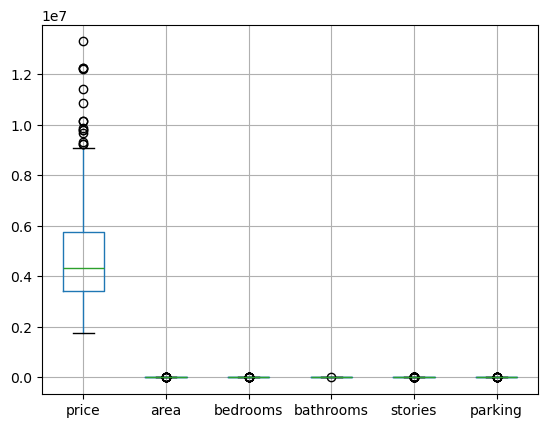

In [40]:
df_num.boxplot()
plt.show()

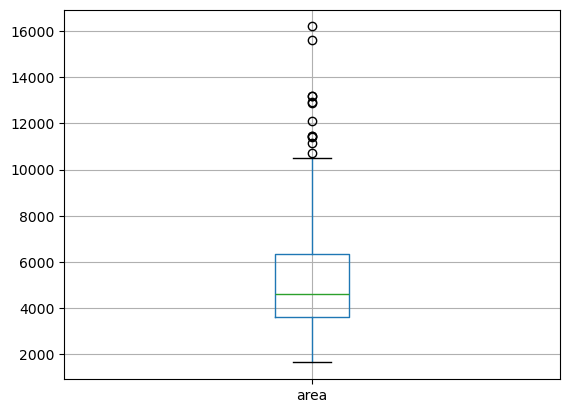

In [41]:
df_num.boxplot(column='area')
plt.show()

In [136]:
# filter the categorical variables from the data
df_cat = df.select_dtypes(exclude = np.number)
df_cat.columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [137]:
# find the range
print(df_num.quantile(0.75)-df_num.quantile(0.25))

price       2310000.000000
area           2760.000000
bedrooms          1.000000
bathrooms         1.000000
stories           1.000000
parking           1.000000
dtype: float64


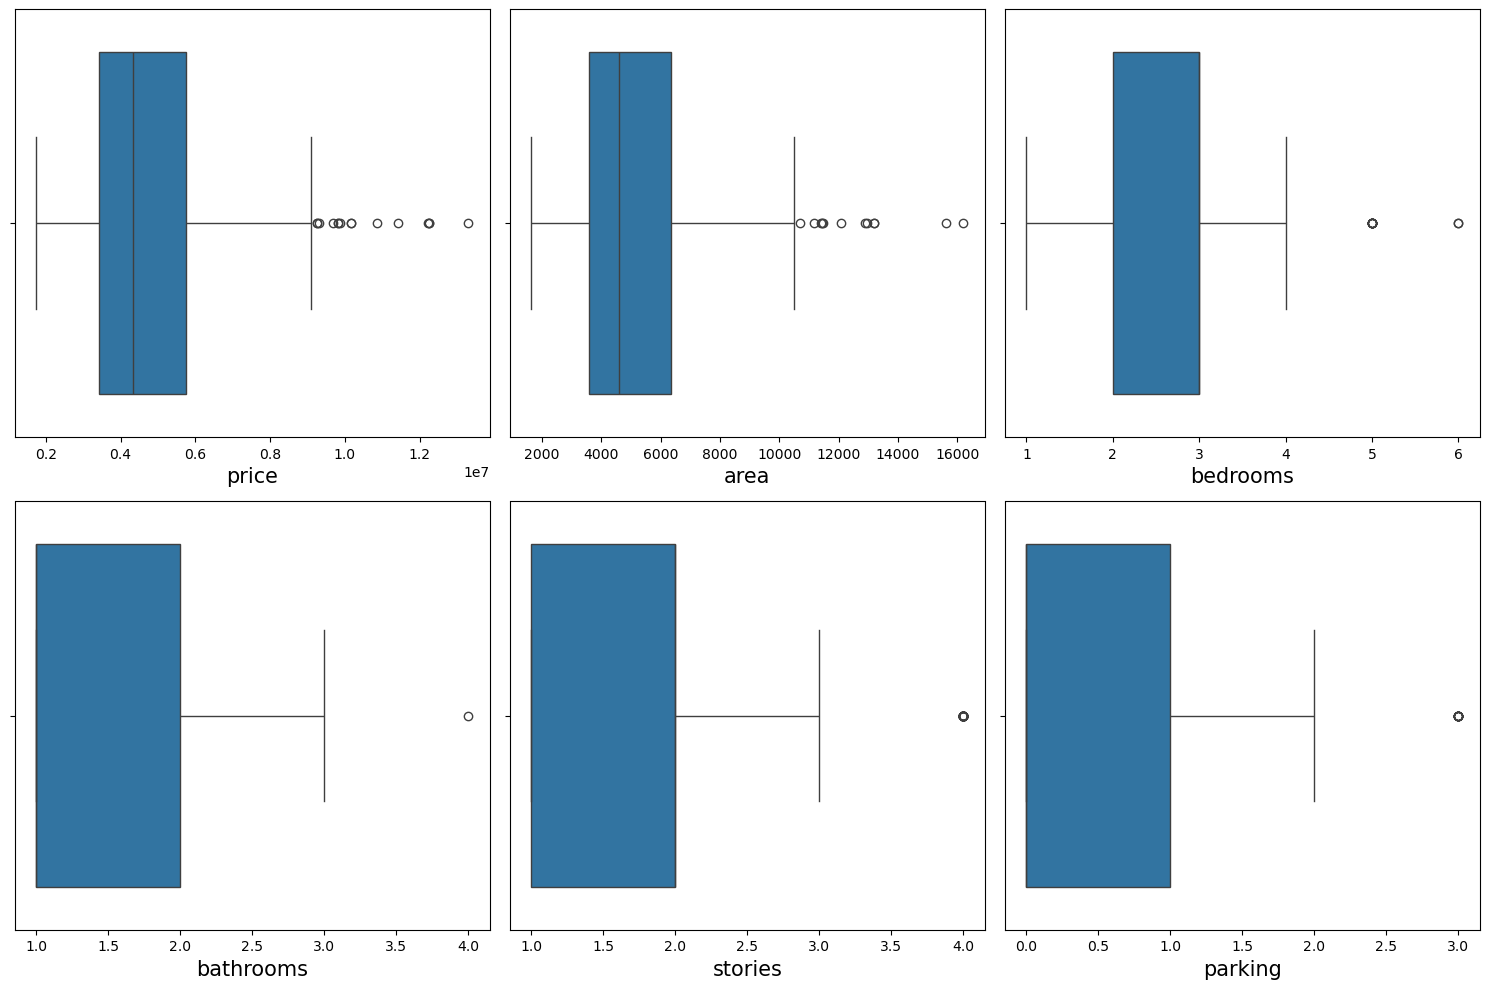

In [138]:
#4_2_1 - This is to visualize the distribution of numeric data through box plots.

import seaborn as sns
import matplotlib.pyplot as plt

# Filter the numeric columns from your DataFrame
df_num = df.select_dtypes(include=np.number)

# Create a grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Iterate over the numeric columns and their corresponding subplots
for column, subplot in zip(df_num.columns, axes.flatten()):
    sns.boxplot(x=df[column], ax=subplot)
    subplot.set_xlabel(column, fontsize=15)

plt.tight_layout()
plt.show()

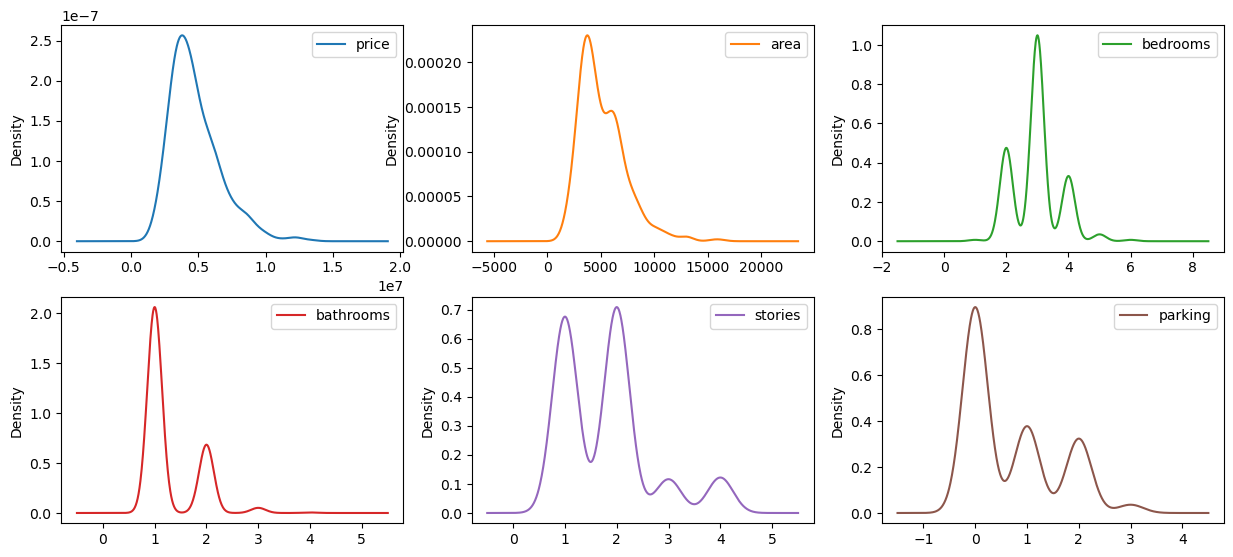

In [45]:
#4_2_2 - This is to visualize the distribution of variables in a DataFrame using density plots
# set plot size
plt.rcParams["figure.figsize"] = [15,10]

# plot density plot using plot()
# kind: set the type of plot
# subplots: indicates whether to plot subplot for each variable or a single line plot
# layout: specify the arrangement of the subplots
# sharex: indicates whether to have the same scale on x-axis of all subplots
df.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)

# show plot
plt.show()

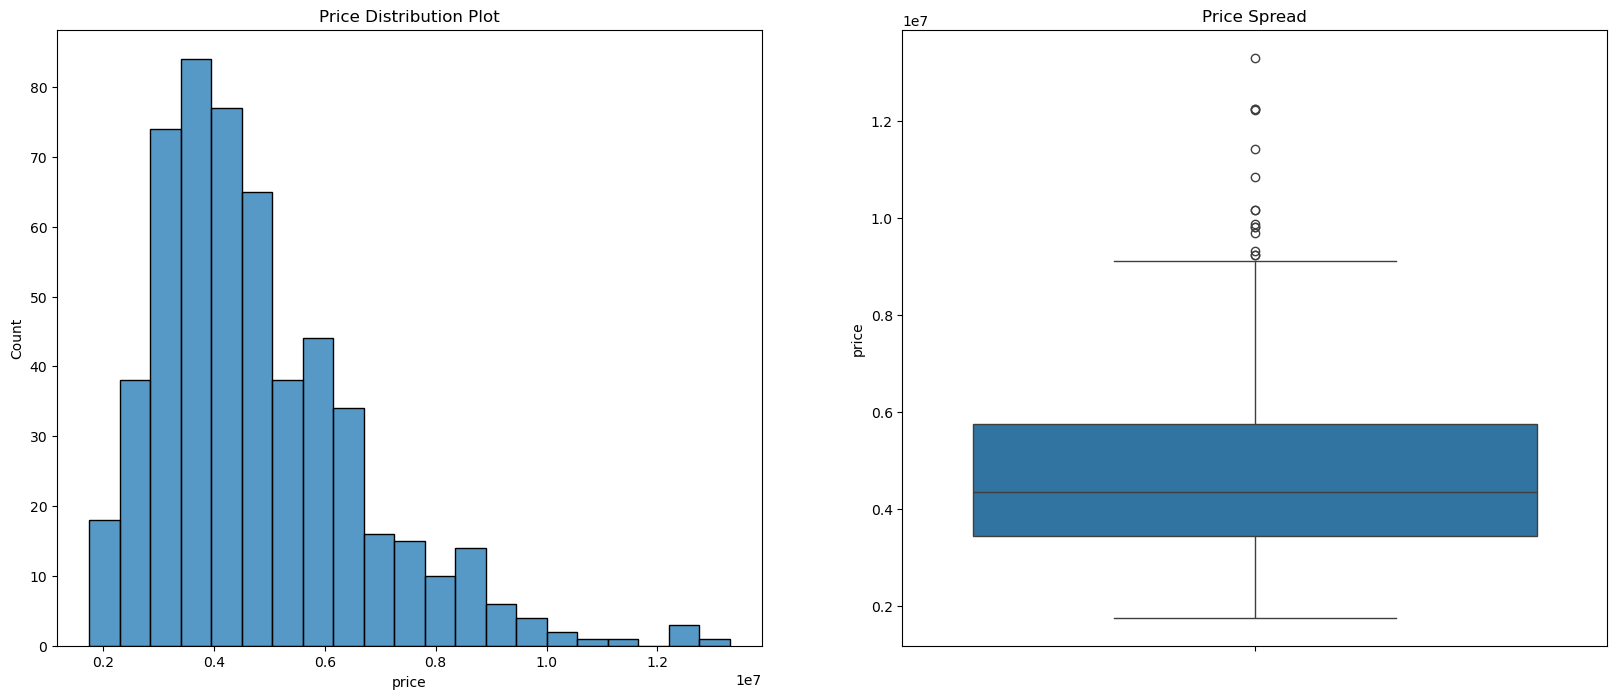

In [46]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Price Distribution Plot')
sns.histplot(df.price)

plt.subplot(1,2,2)
plt.title('Price Spread')
sns.boxplot(y=df.price)

plt.show()

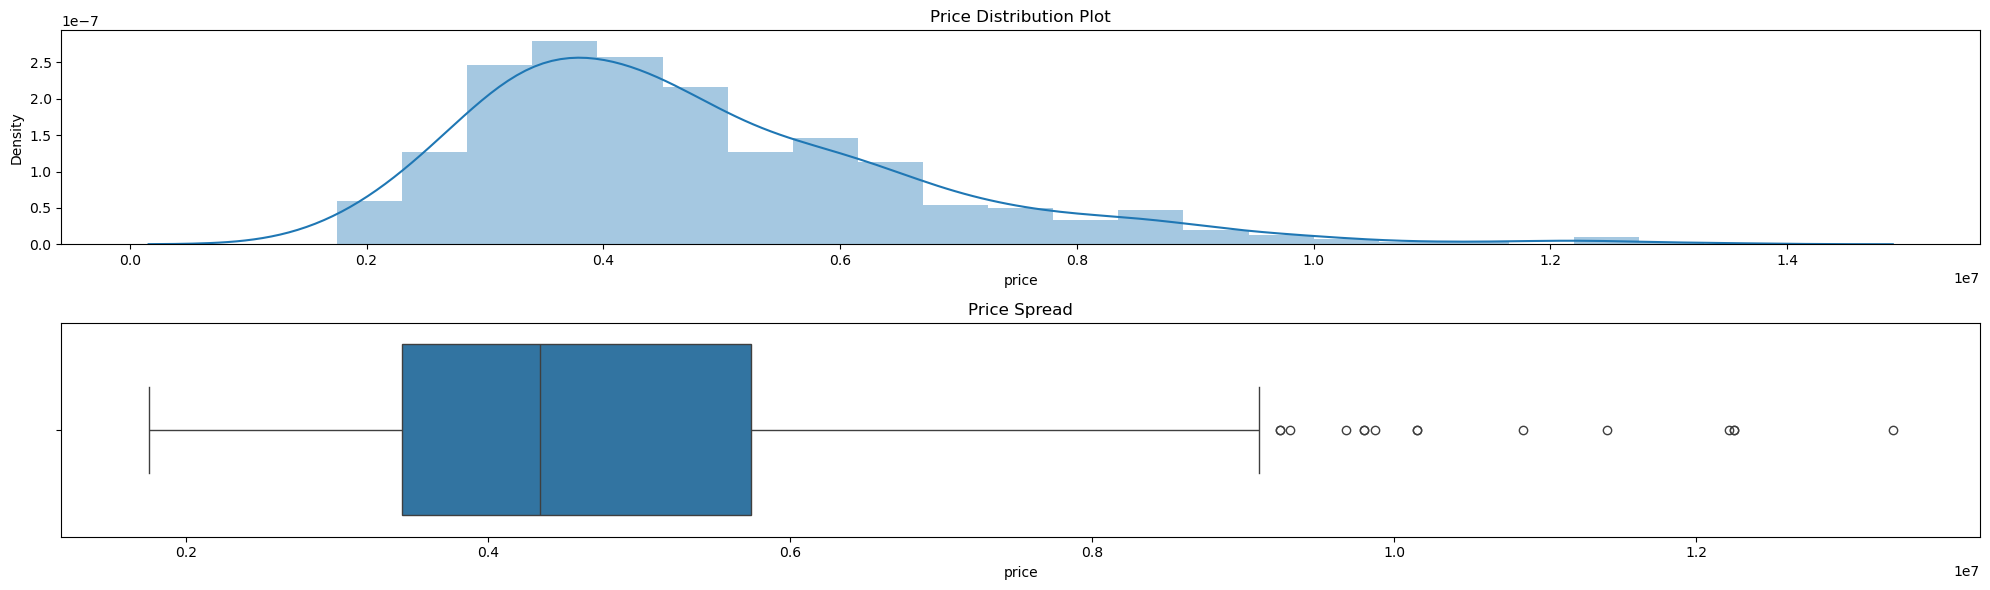

In [47]:
plt.figure(figsize=(20,6))

plt.subplot(2,1,1)  # Create two rows, one column, and select the first subplot
plt.title('Price Distribution Plot')
sns.distplot(df.price)

plt.subplot(2,1,2)  # Create two rows, one column, and select the second subplot
plt.title('Price Spread')
sns.boxplot(x=df.price, orient="h")

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

In [48]:
df_num.price.mean(), df_num.price.median(), df_num.price.mode()

(4766729.247706422,
 4340000.0,
 0    3500000
 1    4200000
 Name: price, dtype: int64)

In [49]:
df_num.price.skew()

1.2122388370279802

In [50]:
df_num.price.kurtosis()

1.9601302314151994

In [51]:
df_num.price.describe()

count        545.000000
mean     4766729.247706
std      1870439.615657
min      1750000.000000
25%      3430000.000000
50%      4340000.000000
75%      5740000.000000
max     13300000.000000
Name: price, dtype: float64

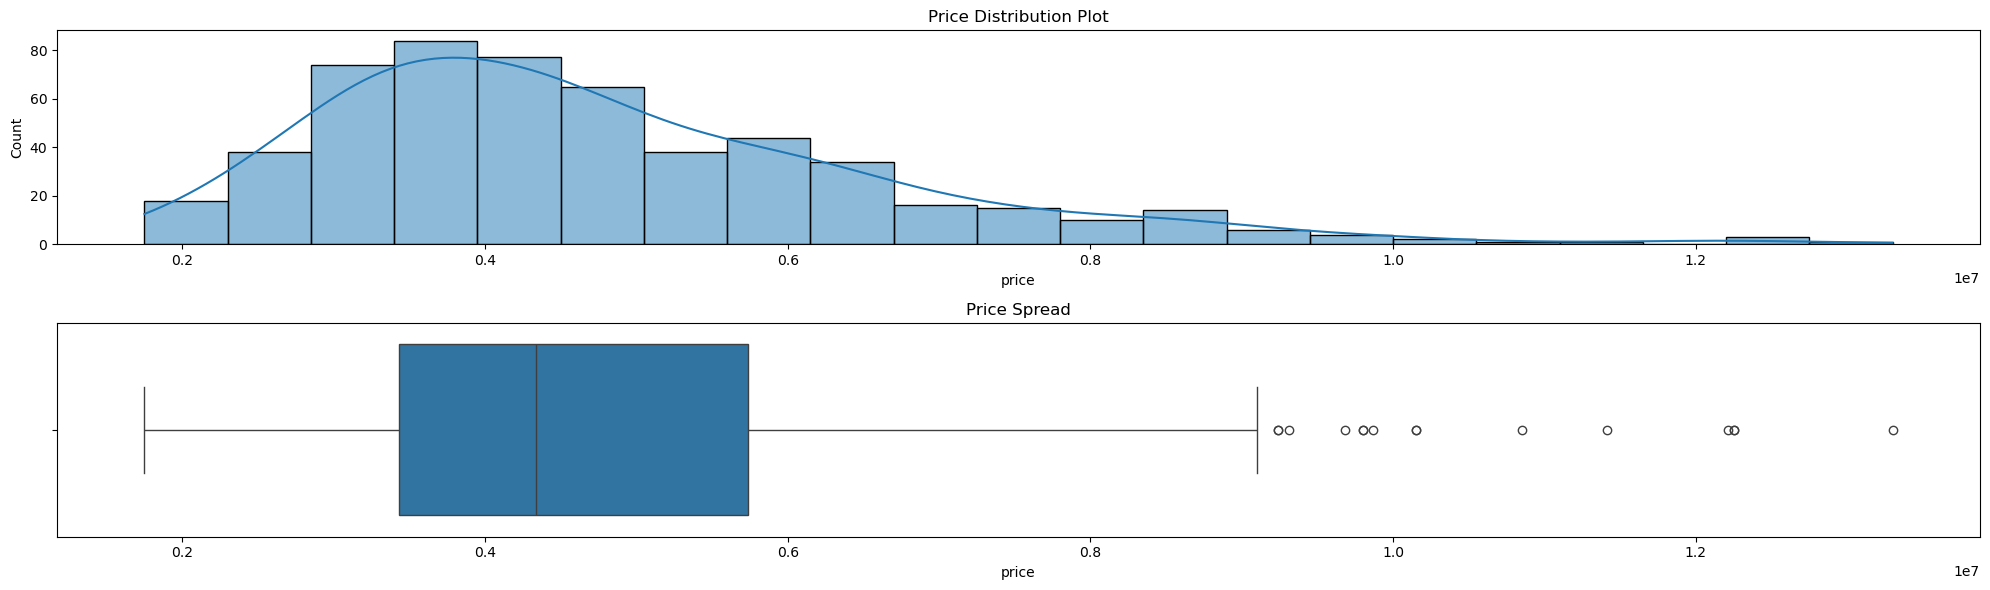

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,6))

plt.subplot(2,1,1)  # Create two rows, one column, and select the first subplot
plt.title('Price Distribution Plot')
sns.histplot(df.price, kde=True)

plt.subplot(2,1,2)  # Create two rows, one column, and select the second subplot
plt.title('Price Spread')
sns.boxplot(x=df.price, orient="h")

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()


In [53]:
df_num.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

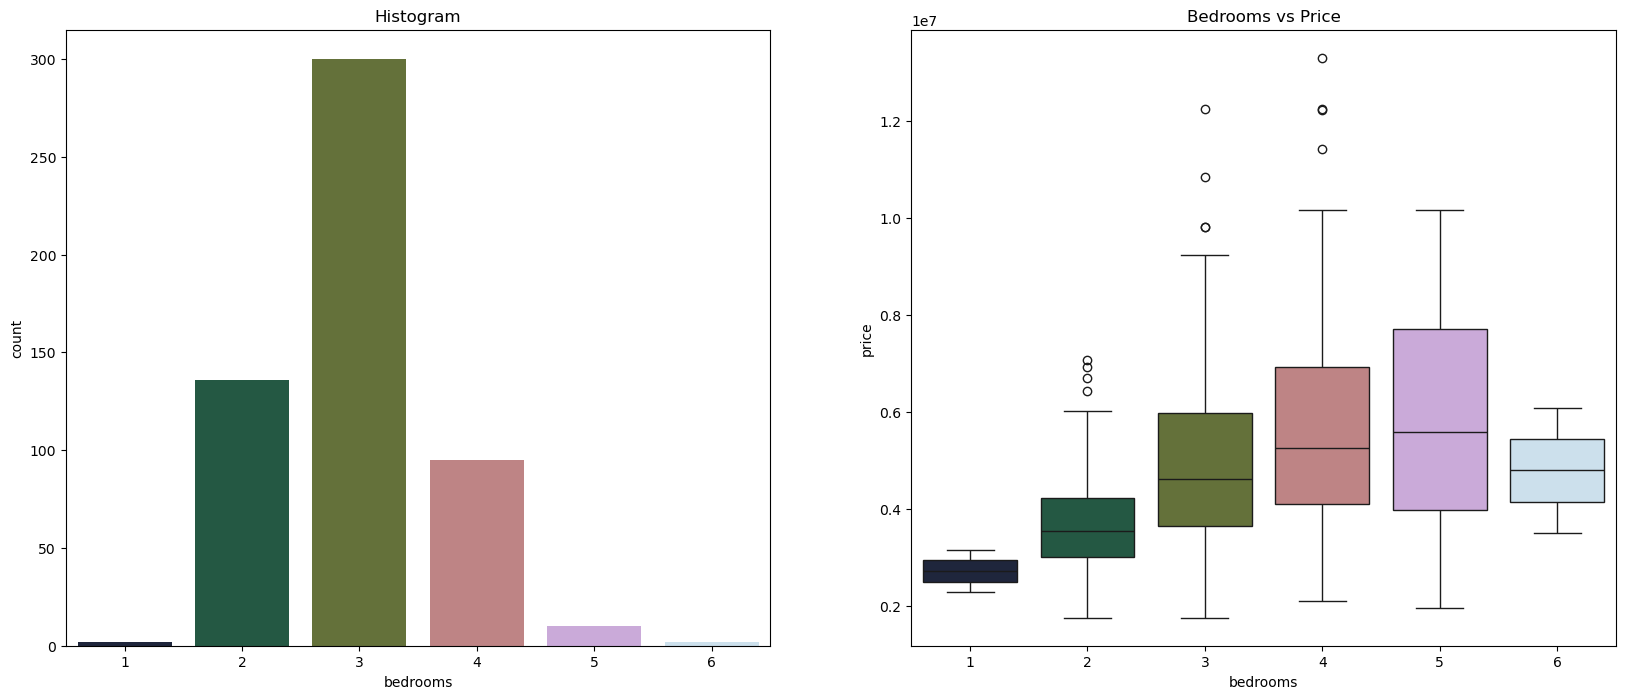

In [54]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Histogram')
sns.countplot(x='bedrooms', palette=("cubehelix"), data=df)

plt.subplot(1,2,2)
plt.title('Bedrooms vs Price')
sns.boxplot(data=df, x='bedrooms', y='price', palette=("cubehelix"))

plt.show()

In [55]:
df_num.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

In [56]:
df_num.bedrooms.value_counts()

bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: count, dtype: int64

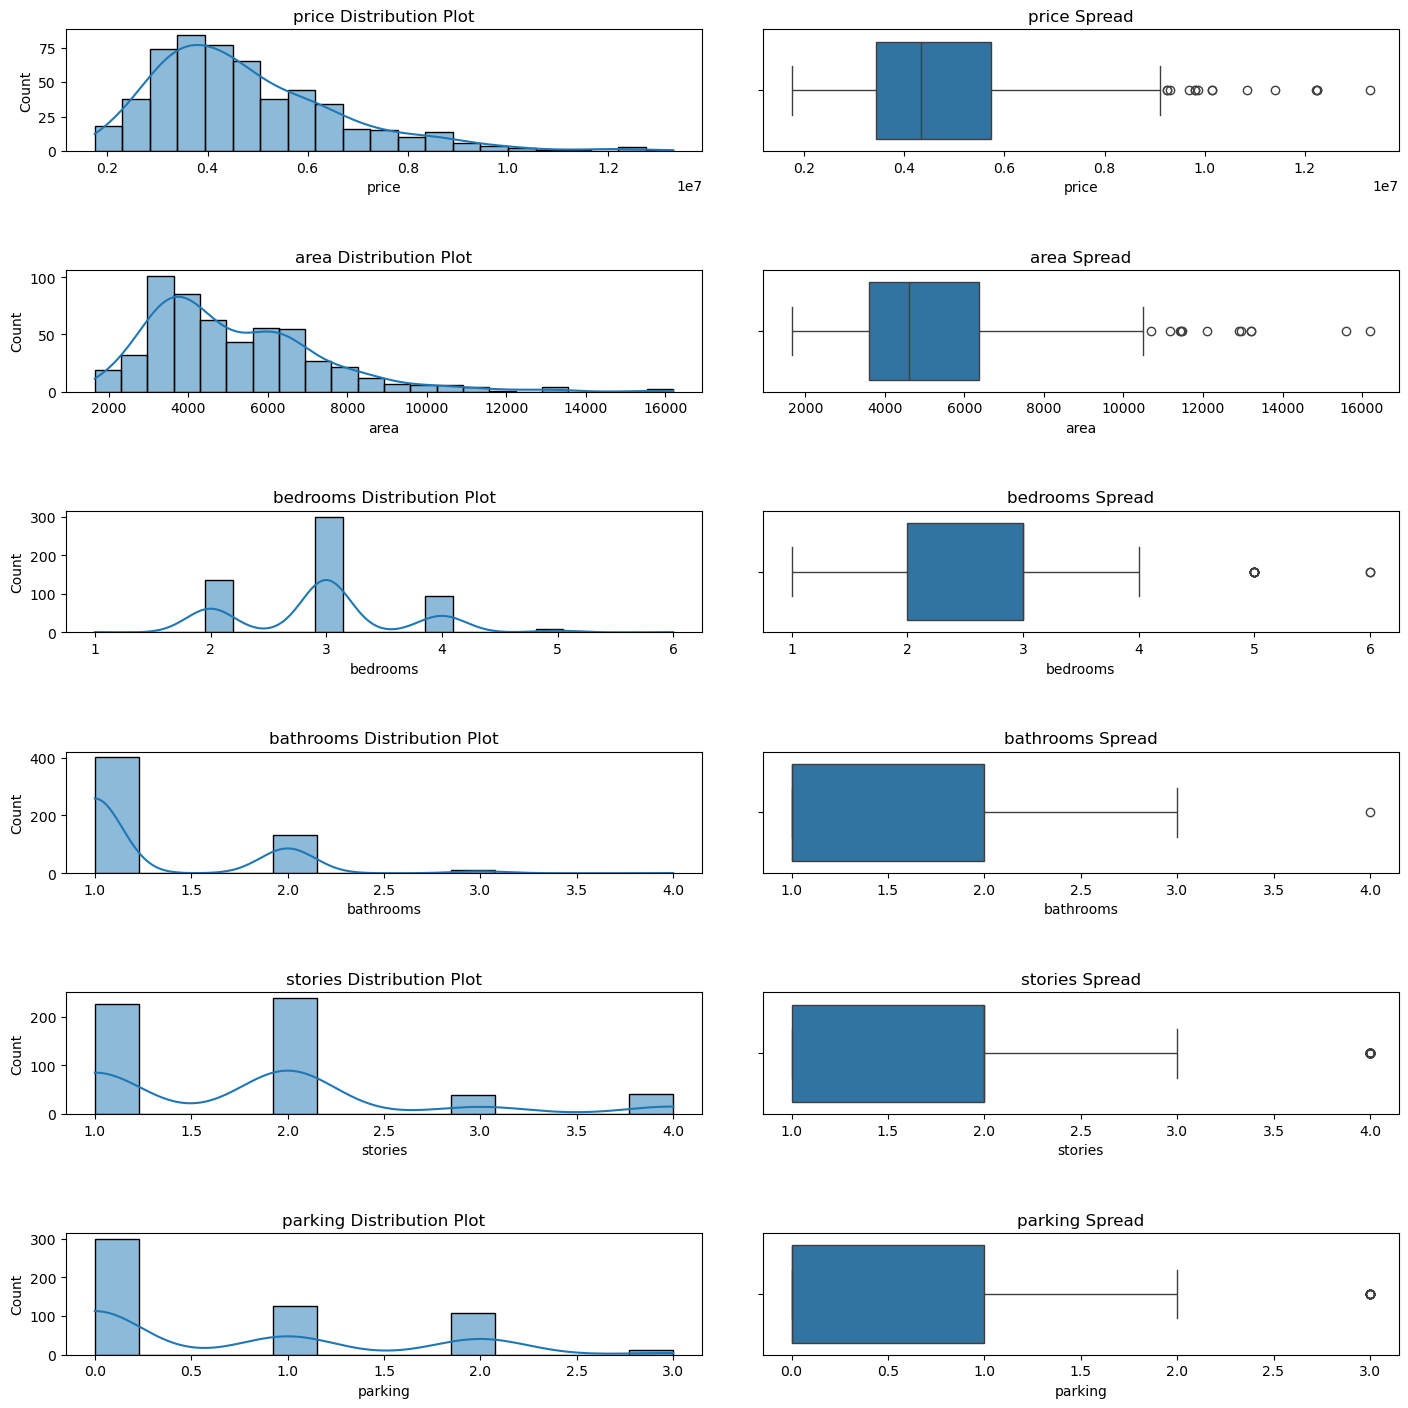

In [57]:
# Determine the number of rows and columns for subplots based on the number of numeric columns
n_rows = len(df_num.columns)
n_cols = 2  # Two plots per column (histogram and box plot)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))

# Iterate over the numeric columns and their corresponding subplots
for i, column in enumerate(df_num.columns):
    sns.histplot(df[column], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'{column} Distribution Plot')
    
    sns.boxplot(x=df[column], ax=axes[i, 1])
    axes[i, 1].set_title(f'{column} Spread')

plt.tight_layout(pad=4.0)
plt.show()

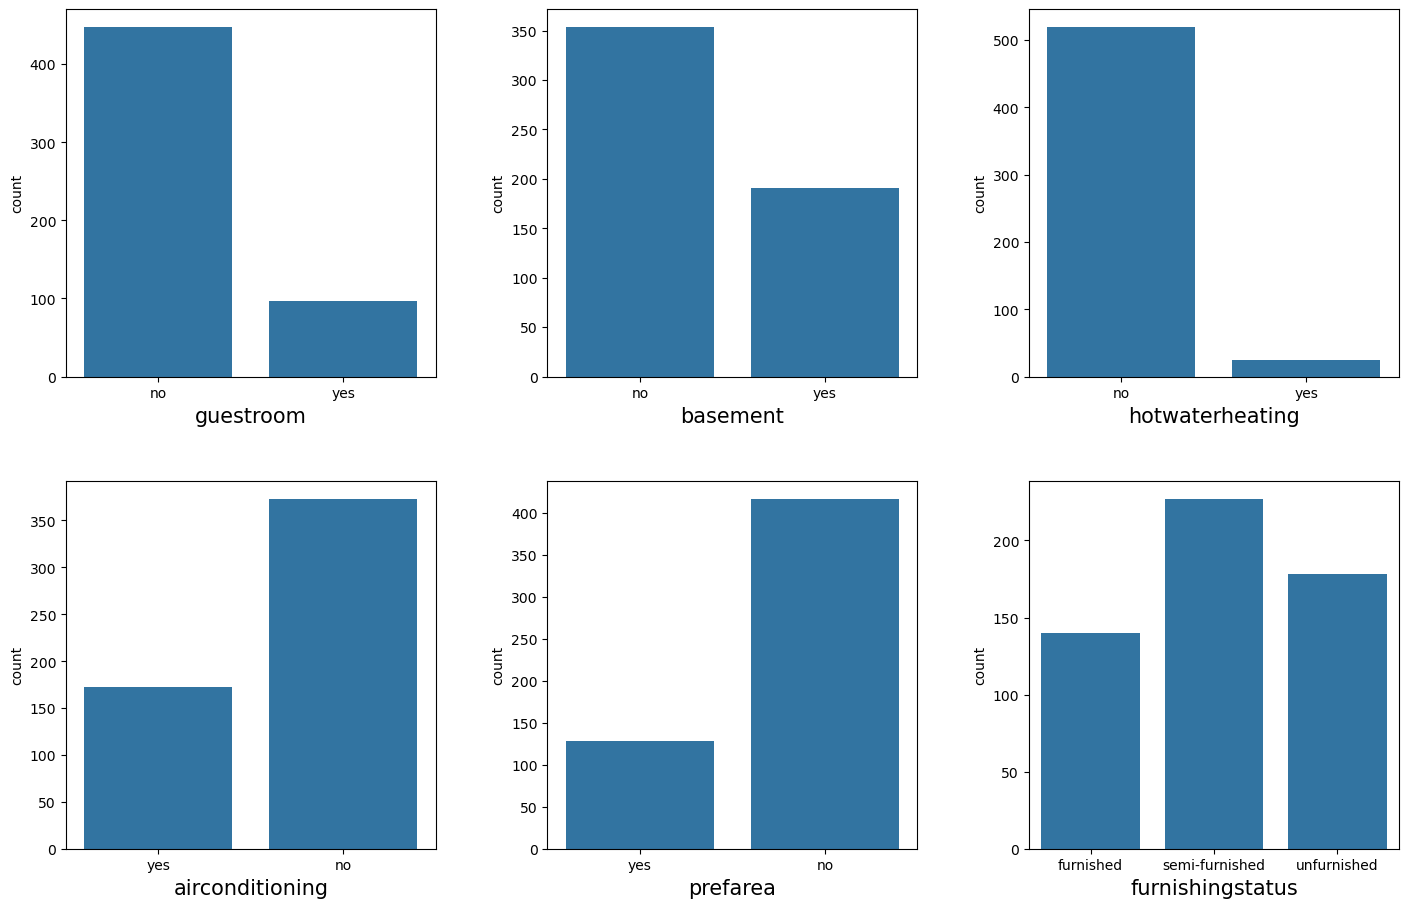

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get a list of categorical variables from the DataFrame
categorical_variables = df_cat.columns[1:]

# Calculate the number of rows and columns for subplots
num_rows = 2
num_cols = 3

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Iterate over categorical variables and their corresponding subplots
for variable, subplot in zip(categorical_variables, axes.flatten()):
    sns.countplot(data=df, x=variable, ax=subplot)
    subplot.set_xticklabels(subplot.get_xticklabels())
    subplot.set_xlabel(variable, fontsize=15)

plt.tight_layout(pad=4.0)
plt.show()


In [59]:
# use skew() to calculate the skewness
skew = df.skew(numeric_only=True)

# print the skewness
print(skew)

price       1.212239
area        1.321188
bedrooms    0.495684
bathrooms   1.589264
stories     1.082088
parking     0.842062
dtype: float64


In [60]:
# use kurt() to calculate the kurtosis
df.kurt(numeric_only=True)

price        1.960130
area         2.751480
bedrooms     0.728323
bathrooms    2.164856
stories      0.679404
parking     -0.573063
dtype: float64

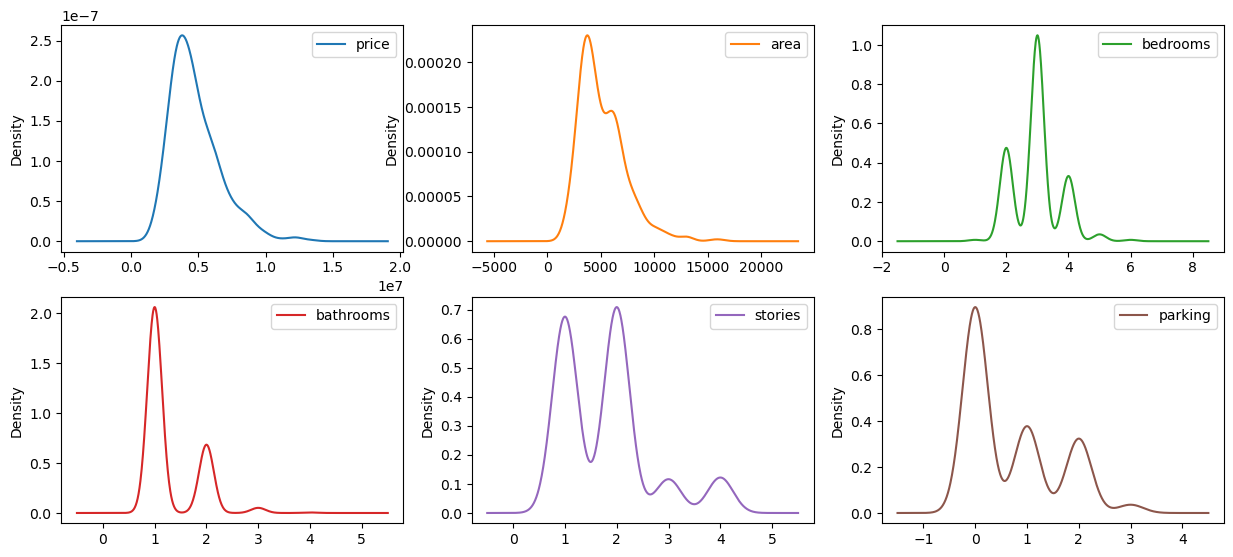

In [61]:
# set plot size
plt.rcParams["figure.figsize"] = [15,10]

# plot density plot using plot()
# kind: set the type of plot
# subplots: indicates whether to plot subplot for each variable or a single line plot
# layout: specify the arrangement of the subplots
# sharex: indicates whether to have the same scale on x-axis of all subplots
df.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)

# show plot
plt.show()

In [62]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

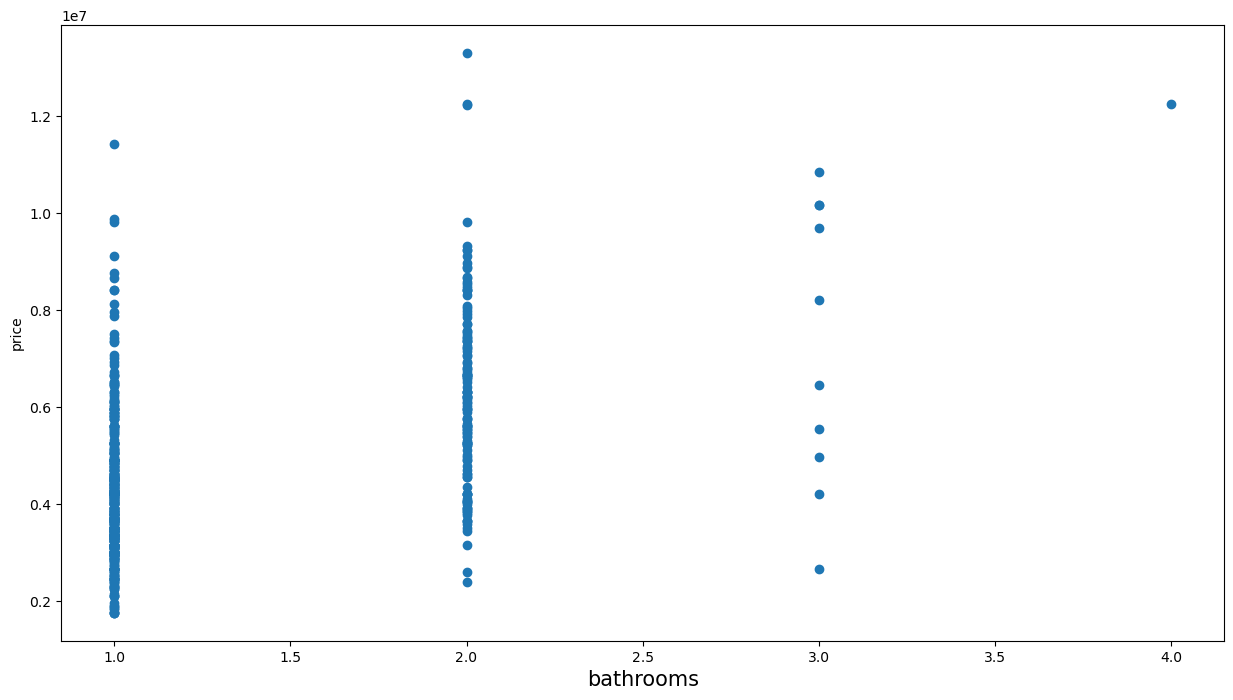

In [63]:
# initialize the figure 
# figsize: set the plot size
fig, ax = plt.subplots(figsize=(15,8))

# plot the scatter plot
ax.scatter(df["bathrooms"], df["price"])

# set the x-axis label
# fontsize: set the font size of the label
ax.set_xlabel("bathrooms", fontsize = 15)

# set the y-axis label
# fontsize: set the font size of the label
ax.set_ylabel('price')
plt.show()

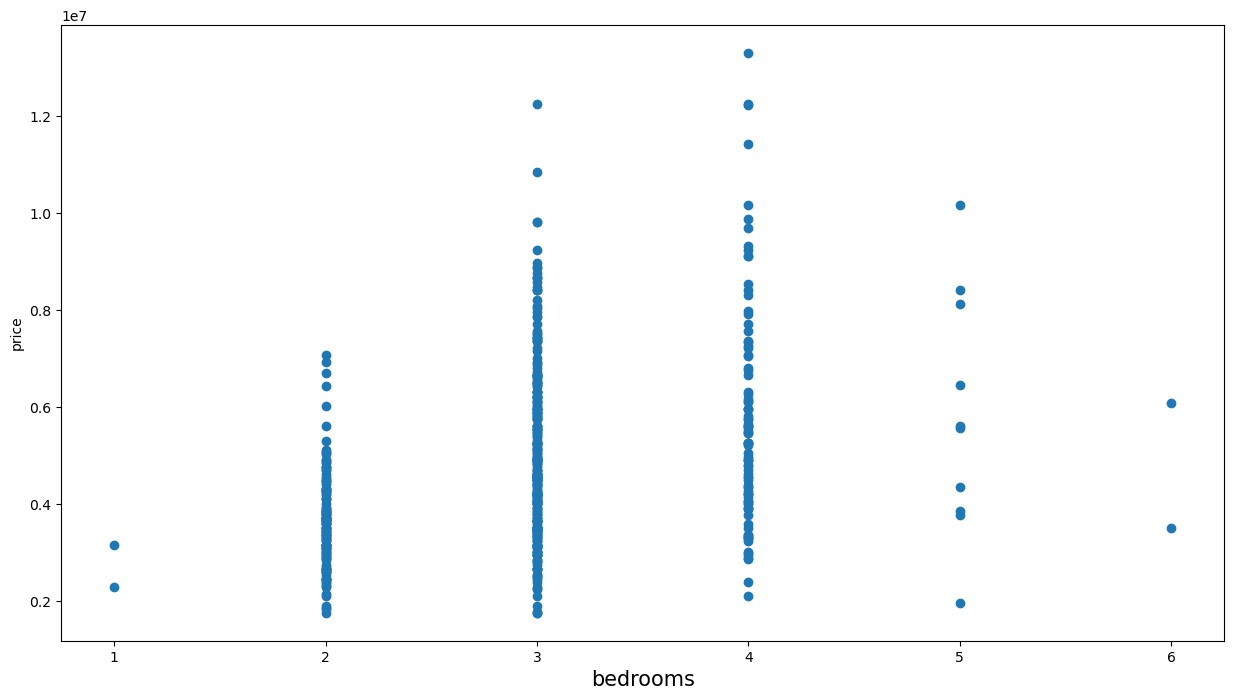

In [64]:
# initialize the figure 
# figsize: set the plot size
fig, ax = plt.subplots(figsize=(15,8))

# plot the scatter plot
ax.scatter(df["bedrooms"], df["price"])

# set the x-axis label
# fontsize: set the font size of the label
ax.set_xlabel("bedrooms", fontsize = 15)

# set the y-axis label
# fontsize: set the font size of the label
ax.set_ylabel('price')
plt.show()

In [65]:
#Correlation

df_num.corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


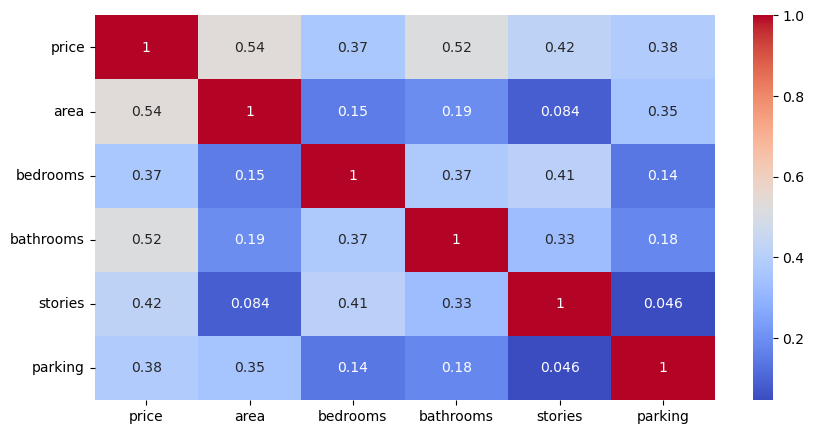

In [66]:
# Finding correlation among features using sns' heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df_num.corr(),annot=True, cmap='coolwarm')
plt.show()

In [67]:
# removing features that are less correlated with our target variable
df_num.corr()[df_num.corr().price<=0.05]

,price,area,bedrooms,bathrooms,stories,parking


In [68]:
# removing features that are less correlated with our target variable
df_num.corr().price[df_num.corr().price <= 0.05]


Series([], Name: price, dtype: float64)

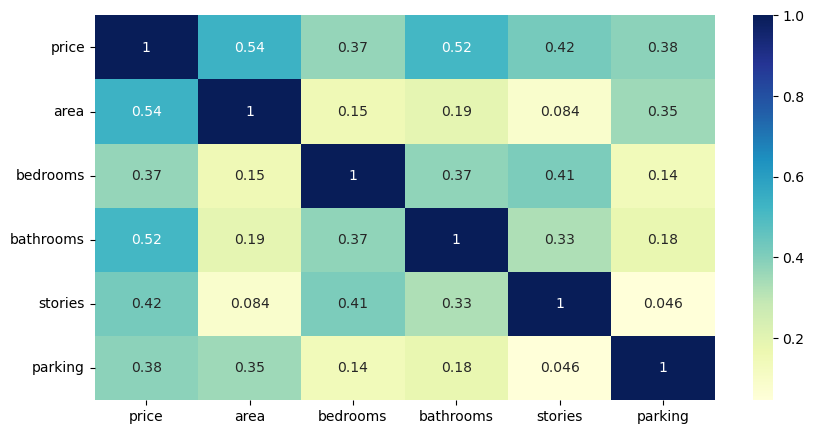

In [69]:
#Correlation using heatmap
plt.figure(figsize = (10, 5))
sns.heatmap(df_num.corr(), annot = True, cmap="YlGnBu")
plt.show()

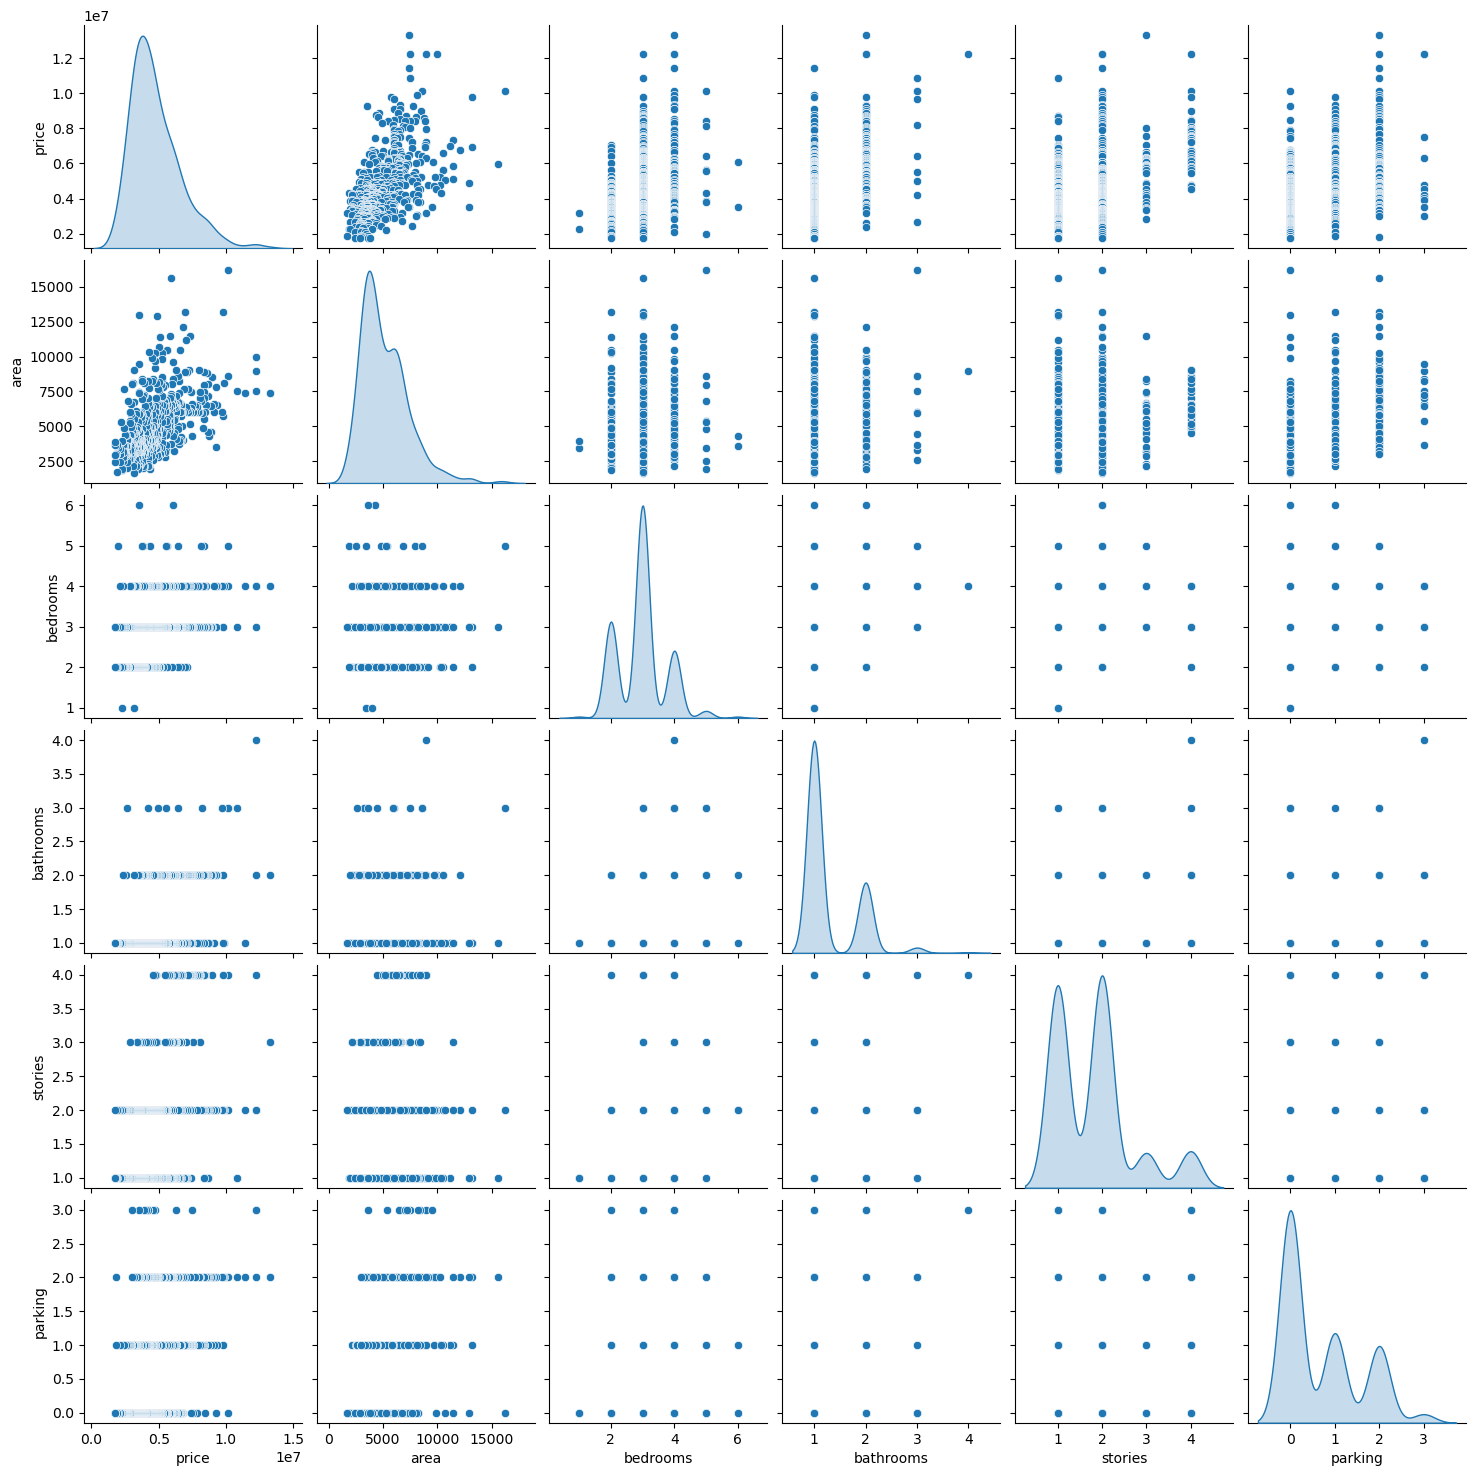

In [70]:
sns.pairplot(data=df_num, diag_kind='kde')
plt.show()

In [71]:
# Do type casting and impute missing values - mean/median and mode (categorical)

In [72]:
# skew - -0.5 to +0.5 - acceptance

In [73]:
df.skew(numeric_only=True)

price       1.212239
area        1.321188
bedrooms    0.495684
bathrooms   1.589264
stories     1.082088
parking     0.842062
dtype: float64

In [74]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [75]:
df.price.describe()

count        545.000000
mean     4766729.247706
std      1870439.615657
min      1750000.000000
25%      3430000.000000
50%      4340000.000000
75%      5740000.000000
max     13300000.000000
Name: price, dtype: float64

In [76]:
df_cat.columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [77]:
df_num.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

In [78]:
# Assuming df is your DataFrame and columns_to_transform contains numerical columns
power_transformer = PowerTransformer()

In [79]:
power_transformer.fit_transform()

TypeError: wrapped() missing 1 required positional argument: 'X'

In [80]:
pt = power_transformer.fit_transform(df[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']])
pt

array([[ 2.77097674,  1.11545673,  1.35413392,  1.66118585,  1.33057611,
         1.34730508],
       [ 2.57875644,  1.55960141,  1.35413392,  1.76728263,  1.81464089,
         1.61415896],
       [ 2.57875644,  1.80429146,  0.12330349,  1.66118585,  0.52147758,
         1.34730508],
       ...,
       [-2.64987025, -0.67255906, -1.39272943, -0.59919871, -1.10310312,
        -0.88952552],
       [-2.64987025, -1.24861134,  0.12330349, -0.59919871, -1.10310312,
        -0.88952552],
       [-2.64987025, -0.51281107,  0.12330349, -0.59919871,  0.52147758,
        -0.88952552]])

In [81]:
pd.DataFrame(data=pt, columns=df_num.columns)

,price,area,bedrooms,bathrooms,stories,parking
0,2.770977,1.115457,1.354134,1.661186,1.330576,1.347305
1,2.578756,1.559601,1.354134,1.767283,1.814641,1.614159
2,2.578756,1.804291,0.123303,1.661186,0.521478,1.347305
3,2.572030,1.140991,1.354134,1.661186,0.521478,1.614159
4,2.410998,1.115457,1.354134,-0.599199,0.521478,1.347305
5,2.291175,1.140991,0.123303,1.757368,-1.103103,1.347305
6,2.131129,1.458455,1.354134,1.757368,1.814641,1.347305
7,2.131129,2.888980,2.396902,1.757368,0.521478,-0.889526
8,2.063568,1.323247,1.354134,-0.599199,0.521478,1.347305
9,2.046338,0.498283,0.123303,1.661186,1.814641,0.802296


In [82]:
df_pt = pd.DataFrame(data=pt, columns=df_num.columns)
df_pt.head()

,price,area,bedrooms,bathrooms,stories,parking
0,2.770977,1.115457,1.354134,1.661186,1.330576,1.347305
1,2.578756,1.559601,1.354134,1.767283,1.814641,1.614159
2,2.578756,1.804291,0.123303,1.661186,0.521478,1.347305
3,2.572030,1.140991,1.354134,1.661186,0.521478,1.614159
4,2.410998,1.115457,1.354134,-0.599199,0.521478,1.347305


In [83]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [84]:
df_pt.head()

,price,area,bedrooms,bathrooms,stories,parking
0,2.770977,1.115457,1.354134,1.661186,1.330576,1.347305
1,2.578756,1.559601,1.354134,1.767283,1.814641,1.614159
2,2.578756,1.804291,0.123303,1.661186,0.521478,1.347305
3,2.572030,1.140991,1.354134,1.661186,0.521478,1.614159
4,2.410998,1.115457,1.354134,-0.599199,0.521478,1.347305


In [85]:
mean_values = df_pt.mean(axis=0)
std_dev_values = df_pt.std(axis=0)

print("Mean values:", mean_values)
print("Standard Deviation values:", std_dev_values)


Mean values: price        0.000000
area         0.000000
bedrooms     0.000000
bathrooms   -0.000000
stories      0.000000
parking      0.000000
dtype: float64
Standard Deviation values: price       1.000919
area        1.000919
bedrooms    1.000919
bathrooms   1.000919
stories     1.000919
parking     1.000919
dtype: float64


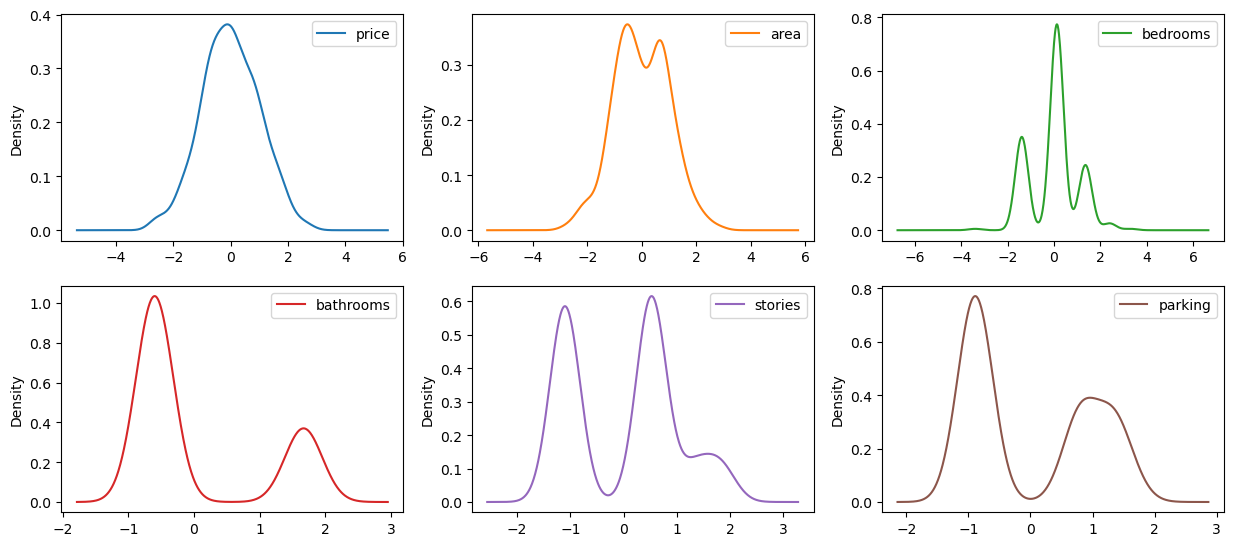

In [86]:
# set plot size
plt.rcParams["figure.figsize"] = [15,10]

# plot density plot using plot()
# kind: set the type of plot
# subplots: indicates whether to plot subplot for each variable or a single line plot
# layout: specify the arrangement of the subplots
# sharex: indicates whether to have the same scale on x-axis of all subplots
df_pt.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)

# show plot
plt.show()

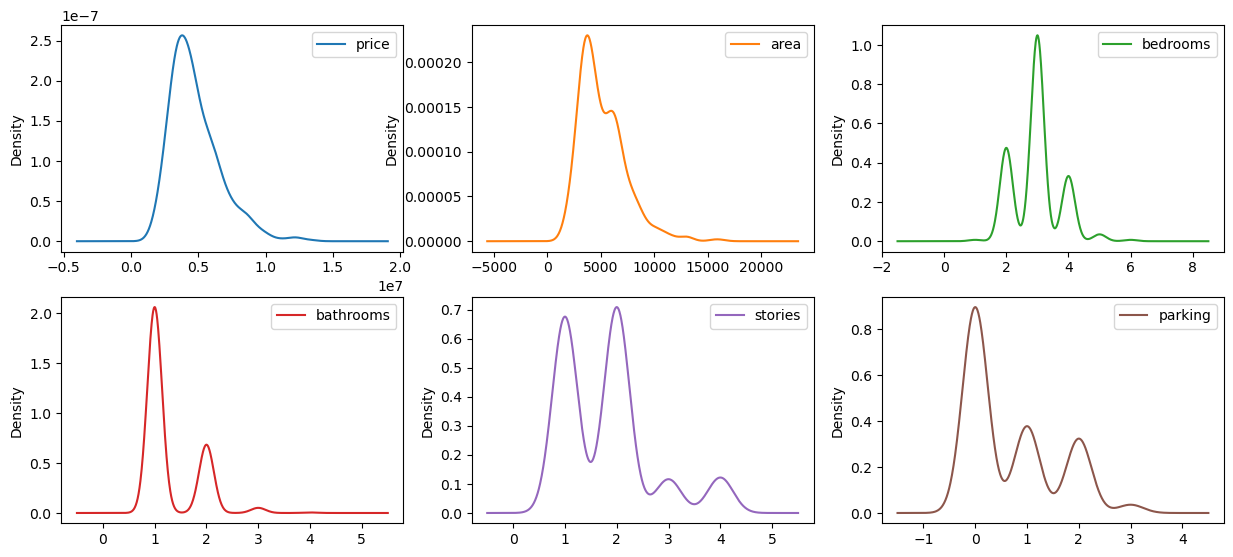

In [87]:
# set plot size
plt.rcParams["figure.figsize"] = [15,10]

# plot density plot using plot()
# kind: set the type of plot
# subplots: indicates whether to plot subplot for each variable or a single line plot
# layout: specify the arrangement of the subplots
# sharex: indicates whether to have the same scale on x-axis of all subplots
df.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)

# show plot
plt.show()

In [88]:
df_cat.columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [89]:
df_cat.head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished


In [90]:
df_cat_encoded = pd.get_dummies(df_cat, drop_first=True)
df_cat_encoded.head(10)

,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,True,False,False,False,True,True,False,False
1,True,False,False,False,True,False,False,False
2,True,False,True,False,False,True,True,False
3,True,False,True,False,True,True,False,False
4,True,True,True,False,True,False,False,False
5,True,False,True,False,True,True,True,False
6,True,False,False,False,True,True,True,False
7,True,False,False,False,False,False,False,True
8,True,True,True,False,True,True,False,False
9,True,True,False,False,True,True,False,True


In [91]:
df_cat_encoded.columns

Index(['mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [92]:
df_pt.head()

,price,area,bedrooms,bathrooms,stories,parking
0,2.770977,1.115457,1.354134,1.661186,1.330576,1.347305
1,2.578756,1.559601,1.354134,1.767283,1.814641,1.614159
2,2.578756,1.804291,0.123303,1.661186,0.521478,1.347305
3,2.572030,1.140991,1.354134,1.661186,0.521478,1.614159
4,2.410998,1.115457,1.354134,-0.599199,0.521478,1.347305


In [93]:
df_ready = pd.concat([df_pt, df_cat_encoded], axis=1)
df_ready.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,2.770977,1.115457,1.354134,1.661186,1.330576,1.347305,True,False,False,False,True,True,False,False
1,2.578756,1.559601,1.354134,1.767283,1.814641,1.614159,True,False,False,False,True,False,False,False
2,2.578756,1.804291,0.123303,1.661186,0.521478,1.347305,True,False,True,False,False,True,True,False
3,2.572030,1.140991,1.354134,1.661186,0.521478,1.614159,True,False,True,False,True,True,False,False
4,2.410998,1.115457,1.354134,-0.599199,0.521478,1.347305,True,True,True,False,True,False,False,False


In [94]:
X.head()

NameError: name 'X' is not defined

In [95]:
y.head()

NameError: name 'y' is not defined

In [96]:
train_test_split()

ValueError: At least one array required as input

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

NameError: name 'X' is not defined

In [98]:
len(X), len(X_train), len(X_test)

NameError: name 'X' is not defined

In [99]:
0.7*(545)

381.5

In [100]:
# set of independent variables
# drop the target variable using 'drop()'
# 'axis = 1' drops the specified column
X = df_ready.drop('price', axis = 1)

# dependent variable
y = df_ready['price']

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X = sm.add_constant(X)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.3)

# check the dimensions of the train & test subset
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (381, 14)
y_train (381,)
X_test (164, 14)
y_test (164,)


In [101]:
X_train.head()

,const,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
126,1.000000,1.030285,0.123303,-0.599199,-1.103103,1.347305,True,False,True,False,False,True,False,True
363,1.000000,-0.698593,-1.392729,-0.599199,-1.103103,-0.889526,True,False,False,True,False,False,True,False
370,1.000000,-0.241047,-1.392729,-0.599199,-1.103103,1.347305,True,False,False,False,True,False,True,False
31,1.000000,0.976125,0.123303,-0.599199,1.814641,1.347305,True,False,False,False,True,False,True,False
113,1.000000,1.724320,0.123303,-0.599199,-1.103103,1.347305,True,False,True,False,False,True,False,False


In [102]:
import statsmodels
import statsmodels.api as sm

In [103]:
# build a model on training dataset
# fit() is used to fit the OLS model
MLR_model = sm.OLS(y_train, X_train).fit()

# print the summary output
print(MLR_model.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [104]:
y_pred = MLR_model.predict(X_test)

NameError: name 'MLR_model' is not defined

In [100]:
y_pred = MLR_model.predict(X_test)

In [101]:
np.sum((y_pred - y_test)*(y_pred - y_test))/len(y_test)

0.4178691024333501

In [102]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape

In [103]:
mse(y_test, y_pred)

0.4178691024333501

In [104]:
rmse = np.sqrt(mse(y_test, y_pred)/len(y_test))
rmse

0.05047754284739573

In [105]:
np.sum(np.abs((y_pred - y_test)))/len(y_test)

0.5069004491614882

In [106]:
mae(y_test, y_pred)

0.5069004491614882

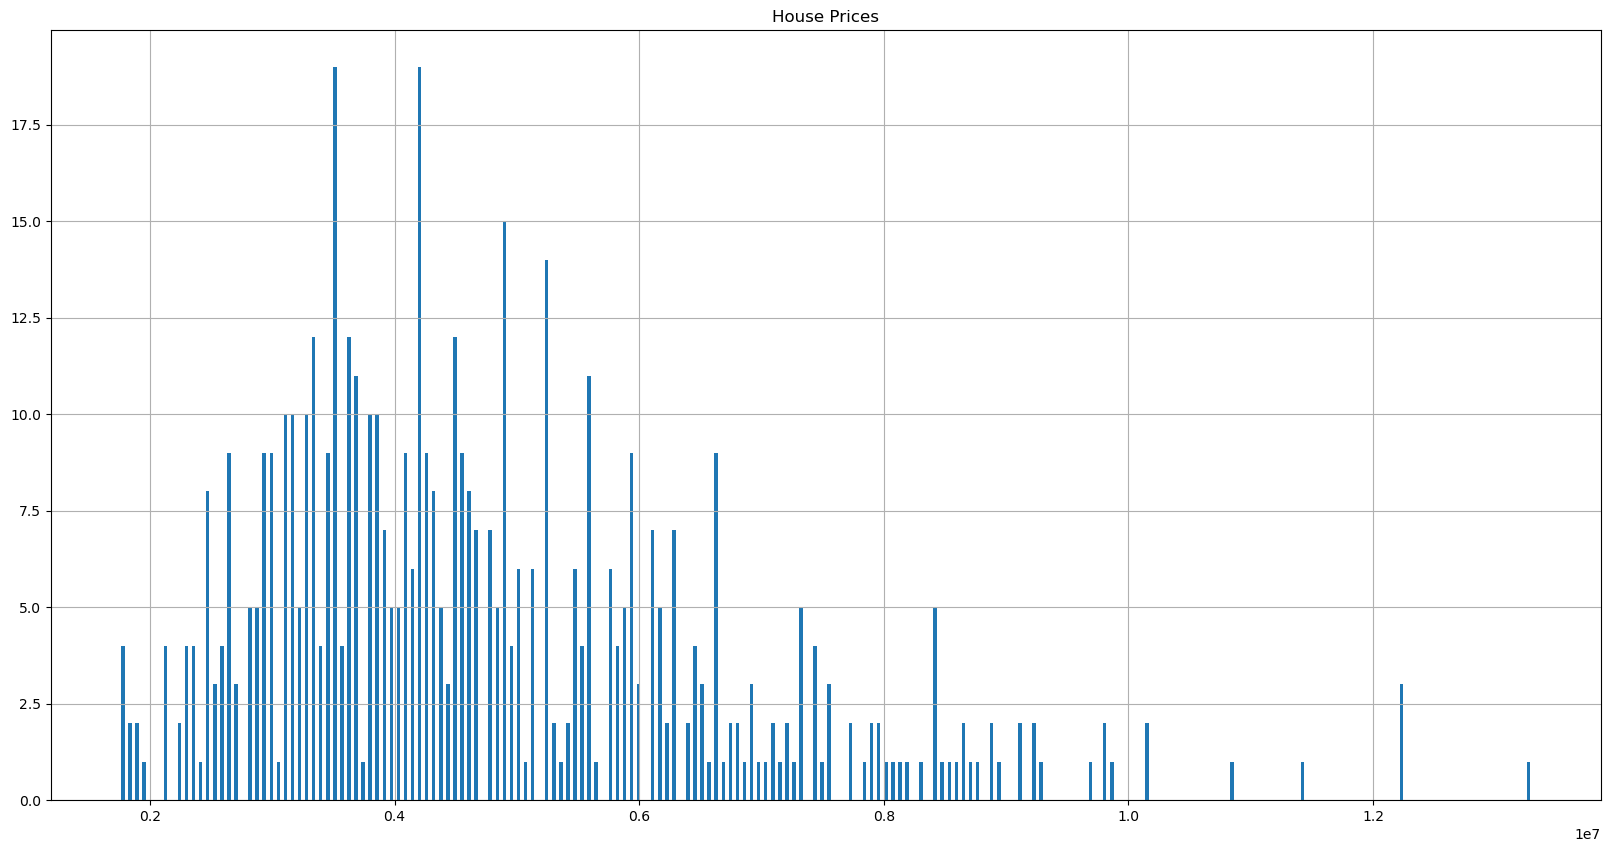

In [120]:
df['price'].hist(bins=200,rwidth = 0.5,figsize=(20,10))
plt.title('House Prices')
plt.show()